In [1]:
##################################################################
#《Python机器学习及实践：从零开始通往Kaggle竞赛之路（2024年度版）》开源代码
#-----------------------------------------------------------------
#                 @章节号：6.7.2（自动编码器的TensorFlow实践）                           
#                 @作者：范淼、徐晟桐 
#                 @购书链接：https://item.jd.com/13482761.html
#                 @电子邮箱：fanmiao.cslt.thu@hotmail.com             
#                 @官方交流QQ群号：561500762                        
##################################################################

In [2]:
from tensorflow.keras import models, layers, losses, optimizers


#设定超参数。
INPUT_SIZE = 784
HIDDEN_SIZE = 256 
EPOCHS = 5
BATCH_SIZE = 64
LEARNING_RATE = 1e-3

#初始化自动编码器模型。
model = models.Sequential()

model.add(layers.Dense(HIDDEN_SIZE, activation='relu'))

model.add(layers.Dense(INPUT_SIZE, activation=None))

#设定神经网络的损失函数、优化方式，以及评估方法。
model.compile(optimizer=optimizers.Adam(LEARNING_RATE), loss=losses.MeanSquaredError())

2021-11-17 13:43:47.343193: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
import pandas as pd


#使用pandas，读取fashion_mnist的训练和测试数据文件。
train_data = pd.read_csv('../datasets/fashion_mnist/fashion_mnist_train.csv')
test_data = pd.read_csv('../datasets/fashion_mnist/fashion_mnist_test.csv')

#从训练数据中，拆解出训练特征和类别标签。
X_train = train_data[train_data.columns[1:]]

#从测试数据中，拆解出测试特征和类别标签。
X_test = test_data[train_data.columns[1:]]

In [4]:
from sklearn.preprocessing import StandardScaler


#初始化数据标准化处理器。
ss = StandardScaler()

#标准化训练数据特征。
X_train = ss.fit_transform(X_train)

#标准化测试数据特征。
X_test = ss.transform(X_test)

In [5]:
#使用fashion_mnist的训练集数据训练网络模型。
model.fit(X_train, X_train, batch_size=64, epochs=5, verbose=1)

2021-11-17 13:43:57.377684: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/5
938/938 [==============================] - 12s 12ms/step - loss: 0.3516
Epoch 2/5
938/938 [==============================] - 11s 12ms/step - loss: 0.1206
Epoch 3/5
938/938 [==============================] - 11s 11ms/step - loss: 0.0980
Epoch 4/5
938/938 [==============================] - 11s 12ms/step - loss: 0.0852
Epoch 5/5
938/938 [==============================] - 10s 11ms/step - loss: 0.0758


In [6]:
test_sample = X_test[:1].reshape((28, 28))

reconstructed_features = model.predict(X_test[:1])

reconstructed_sample = reconstructed_features.reshape((28, 28))

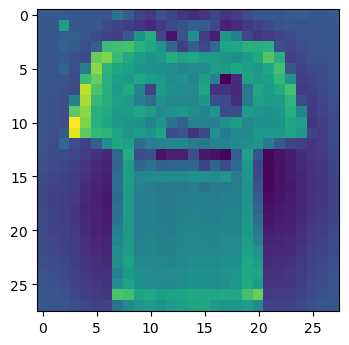

In [7]:
import matplotlib.pyplot as plt


plt.rcParams['figure.dpi'] = 100

#展示原始的图片。
plt.imshow(test_sample)

plt.show()

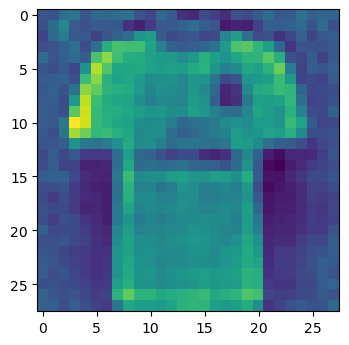

In [8]:
#展示自编码重建的图片。
plt.imshow(reconstructed_sample)

plt.show()